# PROYEK PENAMBANGAN DATA: BLOOD TRANSFUSION SERVICE CENTER

Saya mengambil data Blood Tranfusion Service Center dari website https://archive.ics.uci.edu/ yang selanjutnya akan saya uji sebagai proyek dari mata matakuliah saya, yaitu matakuliah Penambangan Data. Berikut adalah langkah-langkah dalam mengerjakan proyek ini.

## 1. Data Understanding (Memahami Data)

Pada pekerjaan kali ini, saya akan melakukan klasifikasi untuk prediksi pendonor yang akan kembali mendonorkan darahnya. Tujuan dari pekerjaan ini adalah untuk mengembangkan model prediktif yang dapat membantu pusat donor darah dalam mengidentifikasi donor yang kemungkinan besar akan kembali untuk mendonorkan darah lagi dalam periode waktu tertentu berdasarkan berbagai fitur yang tersedia. Dataset yang saya gunakan adalah dataset "Blood Tranfusion Service Center". Dataset Blood Transfusion Service Center berasal dari sebuah studi yang dilakukan oleh Yeh et al. yang dipublikasikan pada tahun 2008. Studi ini dilakukan di Pusat Layanan Transfusi Darah di Hsin-Chu City di Taiwan.

Langkah pertama yang dilakukan adalah mengumpulkan data. Saya mendapatkan dataset dari dari UCI Machine Learning Repository. Dataset ini terdiri dari 748 baris dan 4 fitur, yaitu recency, frequency, monetary, dan time. Fitur-fitur ini bersifat numerik.

<table>
    <tbody>
        <tr>
            <td>no</td>
            <td>nama</td>
            <td>type</td>
            <td>deskripsi</td>
        </tr>
        <tr>
            <td>1</td>
            <td>Recency (months)</td>
            <td>numerik</td>
            <td>Jumlah bulan sejak terakhir kali donor darah.</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Frequency (times)</td>
            <td>numerik</td>
            <td>Jumlah total donor darah</td>
        </tr>
        <tr>
            <td>3</td>
            <td>Monetary (c.c. blood)</td>
            <td>numerik</td>
            <td>Jumlah total darah yang didonorkan (dalam c.c.)</td>
        </tr>
        <tr>
            <td>4</td>
            <td>Time (months)</td>
            <td>numerik</td>
            <td>Jumlah bulan sejak pertama kali donor darah.</td>
        </tr>
        <tr>
            <td>target</td>
            <td>target</td>
            <td>biner</td>
            <td>Indikator apakah donor melakukan donor darah lagi dalam 6 bulan ke depan (1 jika donor lagi, 0 jika tidak)</td>
        </tr>
    </tbody>
</table>


### Menampilkan Data

Berikut adalah cara untuk menampilkan data pada dataset Blood Transfusion Service Center:

In [ ]:
import numpy as np  
import pandas as pd  
df = pd.read_csv('transfusion.csv')  
display(df)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


Selanjutnya, untuk mengetahui jumlah baris dan kolom yang terdapat pada dataset, berikut adalah cara untuk menampilkan jumlah baris dan kolom:

In [ ]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('transfusion.csv')  # Membaca file dataset.csv dan menyimpannya ke dalam DataFrame df
df.shape  # Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame df

(748, 5)

Dari output diatas, dapat disimpulkan bahwa terdapat 748 baris data dan 5 kolom (4 fitur, 1 target).

### Menentukan Missing Value

Missing Value adalah hilangnya beberapa data yang telah diperoleh. Menangani missing value dengan tepat sangat penting untuk memastikan integritas dan akurasi analisis data. Pada dataset Blood Transfusion Service Center selanjutnya dilakukan pengecekan missing value sebagai berikut:

In [ ]:
import numpy as np  
import pandas as pd 
df = pd.read_csv('transfusion.csv') 
df.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
target                   0
dtype: int64

KESIMPULAN: dapat dilihat bahwa tidak terdapat missing values dalam dataset sehingga tidak dibutuhkan proses lebih lanjut untuk penanganan missing value.

### Mengeksplorasi Data

Selanjutnya melakukan eksplorasi data numerik dengan rincian sebagai berikut:

df.describe() hanya digunakan untuk tipe data numerik 
Count: Jumlah data dalam setiap kolom.
Mean: Rata-rata nilai dalam setiap kolom.
Std (Standard Deviation): Standar Deviasi dari nilai dalam setiap kolom.
Min: Nilai minimum dalam setiap kolom.
25%, 50%, 75% (quartiles): Nilai-nilai kuartil yang membagi data menjadi empat bagian sama besar. Kuartil ke-50 adalah median.
Max: Nilai maksimum dalam setiap kolom.


Berikut merupakan program untuk eksplorasi data numerik:

In [ ]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('transfusion.csv')  # Membaca file dataset.csv
newdf = df.drop("target", axis='columns')
newdf.describe() 


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


### Menentukan Outlier

Outlier adalah data yang berbeda secara signifikan dari data lain dalam sebuah set data. Mereka bisa menjadi nilai yang sangat kecil atau sangat besar dibandingkan dengan nilai rata-rata atau mayoritas data lainnya.

LOF (Local Outlier Factor) adalah metode statistik yang digunakan untuk mendeteksi outlier dalam sebuah set data. Metode ini menghitung seberapa jauh suatu titik data berada dari tetangga-tetangganya dalam konteks data tersebut. LOF memberikan nilai yang menggambarkan seberapa "aneh" atau tidak biasa suatu titik data dibandingkan dengan tetangganya. 

Berikut merupakan implementasi dari perhitungan LOF dengan menggunakan library Scikit Learn.

In [ ]:
# Mengimpor pustaka pandas dengan alias 'pd'.
import pandas as pd

# Mengimpor kelas LocalOutlierFactor dari modul neighbors di pustaka Scikit-learn (sklearn).
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset dari file CSV ("dataset.csv") ke dalam DataFrame X menggunakan Pandas.
X = pd.read_csv("transfusion.csv")

# Membuat objek LocalOutlierFactor (LOF).
# n_neighbors=5 menentukan jumlah tetangga yang akan digunakan dalam perhitungan LOF.
# contamination=0.1 menentukan tingkat kontaminasi atau persentase outlier yang diharapkan dalam data.
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Menggunakan metode fit_predict() dari objek LOF untuk menentukan status outlier (outlier atau bukan) untuk setiap sampel dalam data.
# Hasilnya akan berupa array yang berisi prediksi status outlier untuk setiap sampel.
y_pred = lof.fit_predict(X)

# Mencetak tabel prediksi status outlier.
print("Predicted table:", y_pred)

# Mencetak nilai LOF yang bersifat negatif.
# Negative LOF scores memberikan informasi tentang seberapa jauh setiap sampel berada dari tetangganya dalam konteks outlier detection.
print("Negative LOF scores:", -lof.negative_outlier_factor_)

# Cari indeks dari nilai -1 dalam array y_pred
outlier_indices = [index for index, value in enumerate(y_pred) if value == -1]

# Cetak indeks dari nilai -1 untuk mengetahui data ke berapa yang dianggap sebagai outlier
print("Data outlier terdapat pada indeks:", outlier_indices)

Predicted table: [ 1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1 

KESIMPULAN: Disini asumsinya adalah 0.1(10%) dari seluruh data dianggap outlier. output -1 adalah ciri-ciri dari outlier. dan output yang menunjukkan angka-angka desimal yang lebih tinggi dari angka-angka desimal lainnya merupakan outliernya. hal ini ditunjukkan pada indeks ke [2, 5, 6, 11, 15, 19, 20, 47, 48, 49, 64, 67, 72, 90, 96, 105, 106, 138, 144, 176, 181, 205, 208, 243, 285, 295, 313, 314, 325, 334, 338, 369, 395, 399, 402, 439, 448, 462, 468, 469, 487, 490, 492, 494, 496, 497, 498, 499, 510, 514, 517, 525, 533, 543, 545, 550, 555, 558, 571, 578, 596, 604, 623, 639, 644, 650, 661, 663, 667, 707, 719, 730, 732, 746, 747]


## 2. Preprocessing

Preprocessing adalah tahapan dalam proses analisis data yang melibatkan persiapan dan pembersihan data mentah agar siap untuk dianalisis atau dimasukkan ke dalam model. Langkah-langkah ini penting untuk memastikan bahwa data berada dalam format yang sesuai dan bebas dari kesalahan yang bisa mempengaruhi hasil analisis.

### Menghapus Outlier

Keberadaan outlier dapat mempengaruhi hasil analisis data, sehingga perlu untuk dilakukan  deteksi dan penghapusan outlier. Berikut merupakan program untuk menghapus outlier:

In [ ]:
# Mengimpor pustaka pandas dengan alias 'pd'.
import pandas as pd

# Mengimpor kelas LocalOutlierFactor dari modul neighbors di pustaka Scikit-learn (sklearn).
from sklearn.neighbors import LocalOutlierFactor

# Membaca dataset dari file CSV ("dataset.csv") ke dalam DataFrame X menggunakan Pandas.
X = pd.read_csv("transfusion.csv")

# Membuat objek LocalOutlierFactor (LOF).
# n_neighbors=5 menentukan jumlah tetangga yang akan digunakan dalam perhitungan LOF.
# contamination=0.1 menentukan tingkat kontaminasi atau persentase outlier yang diharapkan dalam data.
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

# Menggunakan metode fit_predict() dari objek LOF untuk menentukan status outlier (outlier atau bukan) untuk setiap sampel dalam data.
# Hasilnya akan berupa array yang berisi prediksi status outlier untuk setiap sampel.
y_pred = lof.fit_predict(X)

# Cari indeks dari nilai -1 dalam array y_pred
outlier_indices = [index for index, value in enumerate(y_pred) if value == -1]

# Cetak indeks dari nilai -1 untuk mengetahui data ke berapa yang dianggap sebagai outlier
print("Data outlier terdapat pada indeks:", outlier_indices)

# Menghapus baris yang mengandung outlier dari DataFrame
X_cleaned = X.drop(outlier_indices)

# Menyimpan DataFrame yang telah dibersihkan ke file CSV baru
X_cleaned.to_csv("transfusion_tanpa_outlier.csv", index=False)

# Menampilkan jumlah baris asli dan jumlah baris setelah outlier dihapus
print("Jumlah baris asli:", len(X))
print("Jumlah baris setelah outlier dihapus:", len(X_cleaned))
print("Dataset tanpa outlier telah disimpan ke 'transfusion_tanpa_outlier.csv'")

Data outlier terdapat pada indeks: [2, 5, 6, 11, 15, 19, 20, 47, 48, 49, 64, 67, 72, 90, 96, 105, 106, 138, 144, 176, 181, 205, 208, 243, 285, 295, 313, 314, 325, 334, 338, 369, 395, 399, 402, 439, 448, 462, 468, 469, 487, 490, 492, 494, 496, 497, 498, 499, 510, 514, 517, 525, 533, 543, 545, 550, 555, 558, 571, 578, 596, 604, 623, 639, 644, 650, 661, 663, 667, 707, 719, 730, 732, 746, 747]
Jumlah baris asli: 748
Jumlah baris setelah outlier dihapus: 673
Dataset tanpa outlier telah disimpan ke 'transfusion_tanpa_outlier.csv'


Kesimpulan : Kode ini membaca dataset, mendeteksi outlier menggunakan metode Local Outlier Factor, lalu menghapus baris yang mengandung outlier, dan menyimpan dataset yang telah dibersihkan ke file baru yang bernama dataset_tanpa_outlier.csv. Jumlah baris asli adalah 748 baris, setelah outlier dihapus menjadi 673 baris.

### Normalisasi Data

Normalization adalah proses mengubah nilai-nilai dalam dataset sehingga mereka memiliki skala yang seragam. Min-max normalization adalah salah satu teknik normalization yang umum digunakan.  Dalam min-max normalization, nilai-nilai dalam dataset diubah sedemikian rupa sehingga mereka berada dalam rentang tertentu, biasanya 0 hingga 1. Berikut adalah program untuk menormalisasi data:

In [ ]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('transfusion_tanpa_outlier.csv')
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada seluruh fitur
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Setelah menormalisasi data, berikut adalah tampilan datanya:

In [ ]:
df_normalized

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,0.057143,1.000000,1.000000,1.000000,1.0
1,0.000000,0.244898,0.244898,0.270833,1.0
2,0.057143,0.387755,0.387755,0.447917,1.0
3,0.028571,0.469388,0.469388,0.781250,0.0
4,0.028571,0.224490,0.224490,0.343750,0.0
...,...,...,...,...,...
668,0.657143,0.122449,0.122449,0.895833,0.0
669,0.457143,0.040816,0.040816,0.875000,0.0
670,0.657143,0.020408,0.020408,0.375000,0.0
671,0.600000,0.020408,0.020408,0.520833,0.0


Selanjutnya hasil dari normalisasi disimpan dalam file transfusion_normalized.csv untuk diolah lebih lanjut, yakni sebagai berikut:

In [ ]:
# Menyimpan dataset yang telah dinormalisasi ke file CSV baru
df_normalized.to_csv('transfusion_normalized.csv', index=False)

### Pembagian Data

Dataset Blood Transfusion Service Center selanjutnya dibagi menjadi 80% sebagai data training untuk melakukan pelatihan data dan 20% sebagai data testing untuk melakukan pengujian data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca data dari file CSV
data = pd.read_csv('transfusion_normalized.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('target', axis=1)  
y = data['target']

# Membagi data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data pada data pelatihan dan data pengujian
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 538
Jumlah data testing: 135


Kesimpulan: Dari program diatas, dapat disimpulkan bahwa jumlah data training adalah 538 data, sedangkan jumlah data testing adalah sebanyak 135 data.

### Menyimpan Data Training dan Data Testing ke CSV

Selanjutnya saya menyimpan data training dan data testing ke dalam file csv untuk melakukan pemodelan pada tahap berikutnya. Menyimpan data training dan testing ke dalam file CSV membantu memastikan konsistensi, efisiensi, dan integritas dalam pengembangan dan evaluasi pada suatu model. Berikut adalah programnya:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca data dari file CSV
file_path = 'transfusion_normalized.csv'
df = pd.read_csv(file_path)

# Membagi data menjadi 80% untuk training dan 20% untuk testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Menyimpan data training ke file CSV
train_file_path = 'btsc_training_80.csv'
train_df.to_csv(train_file_path, index=False)

# Menyimpan data testing ke file CSV
test_file_path = 'btsc_testing_20.csv'
test_df.to_csv(test_file_path, index=False)

print(f"Data training telah disimpan ke {train_file_path}")
print(f"Data testing telah disimpan ke {test_file_path}")


Data training telah disimpan ke btsc_training_80.csv
Data testing telah disimpan ke btsc_testing_20.csv


Kesimpulan: Dari program diatas, data training disimpan dalam file yang bernama btsc_training_80.csv dan data testing disimpan dalam file yang bernama btsc_testing_80.csv. 

## 3. Pemodelan

Pemodelan dalam penambangan data adalah alat untuk mengubah data mentah menjadi wawasan berharga yang dapat digunakan untuk mendukung keputusan strategis dalam berbagai bidang.

### Prediksi Menggunakan Klasifikasi Naive Bayes  

Naive Bayes adalah sebuah algoritma klasifikasi yang berdasarkan pada Teorema Bayes dengan asumsi kuat (naif) bahwa setiap fitur dari data yang diklasifikasikan adalah independen satu sama lain. Saat diterapkan pada dataset seperti "Blood Transfusion", Naive Bayes dapat digunakan untuk memprediksi apakah seseorang kemungkinan akan menyumbangkan darah dalam jangka waktu tertentu berdasarkan fitur-fitur yang ada dalam dataset.

Teorema Bayes membantu menghitung probabilitas suatu kejadian berdasarkan informasi yang tersedia tentang kejadian lain. Rumusnya adalah:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Beikut merupakan program untuk mengetahui jumlah data yang akan menjadi pemodelan setelah preprocessing:

In [ ]:
import numpy as np  # Import library numpy
import pandas as pd  # Import library pandas
df = pd.read_csv('transfusion_normalized.csv')  # Membaca file dataset.csv dan menyimpannya ke dalam DataFrame df
df.shape  # Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame df

(673, 5)

Kesimpulan: Setelah dilakukannya preprocessing, maka sekarang jumlah baris datanya adalah 673 baris dan 5 kolom berisi 4 fitur dan 1 target.

Berikut merupakan program untuk menampilkan grafik data:

/tmp/ipykernel_48/1178309958.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = newdf.hist(ax=ax)  # Membuat histogram dari DataFrame df dan menampilkannya di axes ax


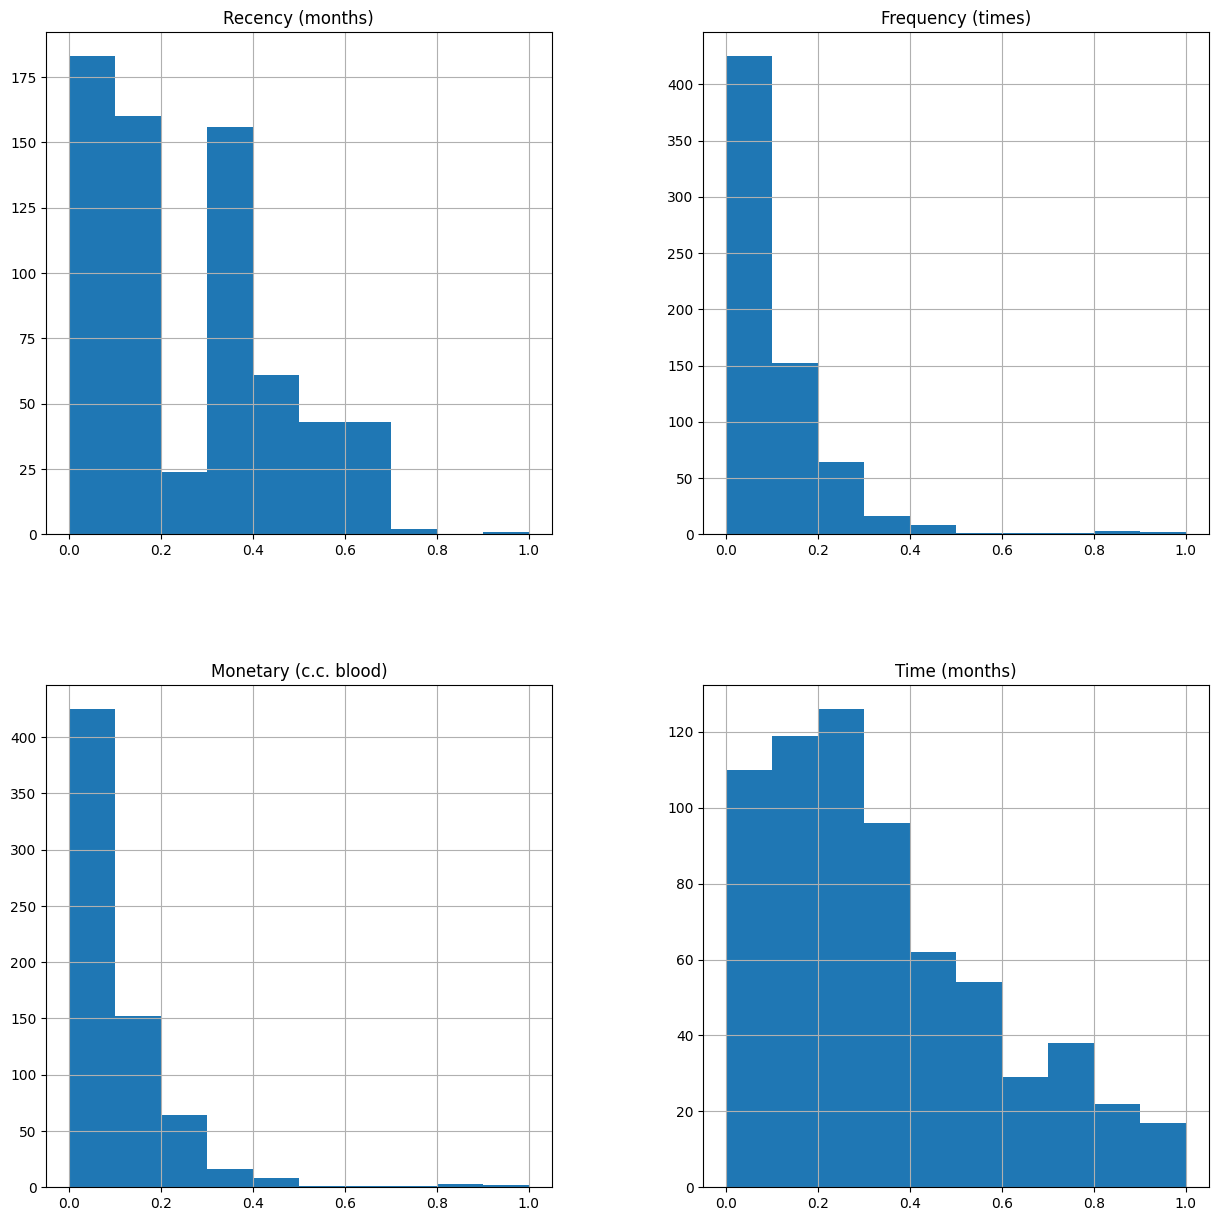

In [ ]:
import matplotlib.pyplot as plt  # Import library matplotlib untuk visualisasi data
%matplotlib inline  
import seaborn as sns  # Import library seaborn untuk visualisasi data statistik
import pandas as pd  # Import library pandas untuk manipulasi data

# Load dataset
df = pd.read_csv('transfusion_normalized.csv')  # Pastikan Anda mengganti 'blood_transfusion.csv' dengan path ke file dataset Anda

# Membuat visualisasi histogram
fig = plt.figure(figsize=(15,15))  # Membuat objek figure dengan ukuran 15x15 inci
ax = fig.gca()  # Mengambil sumbu saat ini (axes) dari objek figure
newdf = df.drop("target", axis='columns')  # Menghapus kolom target dari DataFrame df
g = newdf.hist(ax=ax)  # Membuat histogram dari DataFrame df dan menampilkannya di axes ax

plt.show()  # Menampilkan plot


### Naive Bayes

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membaca dataset yang telah dinormalisasi
df = pd.read_csv('transfusion_normalized.csv')

# Memisahkan fitur dan target
X = df.drop(columns='target')
y = df['target']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada data latih dan data uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Melatih model Naive Bayes
nb.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = nb.predict(X_test_scaled)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membaca dataset yang telah dinormalisasi
df = pd.read_csv('transfusion_normalized.csv')

# Memisahkan fitur dan target
X = df.drop(columns='target')
y = df['target']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada data latih dan data uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Melatih model Naive Bayes
nb.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = nb.predict(X_test_scaled)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)


# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.76


KESIMPULAN: Nilai 0.76 menunjukkan nilai  akurasi dari model K-NN pada dataset yang digunakan. Akurasi adalah ukuran seberapa baik model dapat memprediksi kelas yang benar dari data uji yang belum pernah dilihat sebelumnya. Semakin tinggi nilai output ini (mendekati 1), semakin baik model K-NN bekerja dalam memprediksi kelas yang benar.

## Stacking Ensemble

Stacking Ensemble adalah teknik machine learning yang menggabungkan prediksi dari beberapa model dasar (base models) untuk membangun model yang lebih kuat. Pendekatan ini melibatkan dua tingkat model: tingkat pertama terdiri dari beberapa model dasar yang dilatih menggunakan data pelatihan asli, dan tingkat kedua adalah model meta yang dilatih menggunakan prediksi dari model dasar sebagai fitur.

In [ ]:
pip install scikit-learn

In [ ]:
!pip install mlxtend

### Data Training

k=3 untuk model dasar:

Bagi data menjadi 3 bagian (fold).
Latih model dasar pada 2 fold dan validasi pada 1 fold.
Ulangi untuk setiap fold.
Kumpulkan prediksi dari model dasar untuk membuat dataset baru.


k=5 untuk model dasar:

Bagi data menjadi 5 bagian (fold).
Latih model dasar pada 4 fold dan validasi pada 1 fold.
Ulangi untuk setiap fold.
Kumpulkan prediksi dari model dasar untuk membuat dataset baru.

Catatan:

PREDIKSI MENGGUNAKAN KNN K=3, K=5

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Membaca dataset training
training_data = pd.read_csv('btsc_training_80.csv')

# Memisahkan fitur dan label
X_train = training_data.drop(columns=['target'])  # Ganti 'target' dengan nama kolom target yang sesuai
y_train = training_data['target']

# Membuat model KNN dengan k=3 dan k=5
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)

# Membuat prediksi pada data training
pred_train_knn3 = knn3.predict(X_train)
pred_train_knn5 = knn5.predict(X_train)

# Menambahkan kolom prediksi KNN ke dataset training
training_data['pred_knn3'] = pred_train_knn3
training_data['pred_knn5'] = pred_train_knn5

# Menampilkan beberapa baris pertama dari dataset training dengan prediksi KNN
print("Data Training dengan Prediksi KNN:")
display(training_data)

# Menyimpan dataset training yang sudah termasuk prediksi KNN ke file CSV
training_data.to_csv('training_data_with_pred.csv', index=False)

Data Training dengan Prediksi KNN:


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target,pred_knn3,pred_knn5
0,0.057143,0.142857,0.142857,0.375000,1.0,1.0,1.0
1,0.457143,0.040816,0.040816,0.218750,0.0,0.0,0.0
2,0.457143,0.102041,0.102041,0.822917,0.0,0.0,0.0
3,0.057143,0.020408,0.020408,0.020833,1.0,1.0,1.0
4,0.114286,0.000000,0.000000,0.020833,0.0,1.0,0.0
...,...,...,...,...,...,...,...
533,0.057143,0.102041,0.102041,0.270833,1.0,1.0,1.0
534,0.057143,0.081633,0.081633,0.322917,1.0,1.0,0.0
535,0.400000,0.081633,0.081633,0.270833,0.0,0.0,0.0
536,0.742857,0.081633,0.081633,0.489583,1.0,0.0,0.0


KESIMPULAN: pada tabel Data Pelatihan dengan Prediksi KNN, kolom knn_k3 dan knn_k5 sebagai x_train dan diprediksi targetnya (menghasilkan prediksi dari K=3 dan prediksi dari k=5) serta y_train adalah target asli dari dataset.

META Naive Bayes

Meta-learning dengan menggunakan Naive Bayes sebagai meta model dan KNN sebagai base models memberikan cara yang kuat untuk memanfaatkan kekuatan beberapa algoritma. Dalam contoh ini, prediksi dari model KNN dengan k=3 dan k=5 digabungkan dan digunakan sebagai fitur untuk melatih model Naive Bayes, yang kemudian memberikan prediksi akhir. Berikut adalah program untuk prediksi menggunakan meta naive bayes:

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

# Membaca dataset training (yang sudah memiliki prediksi KNN)
training_data_with_pred = pd.read_csv('training_data_with_pred.csv')

# Memisahkan fitur hasil prediksi KNN untuk meta model
X_meta_train = training_data_with_pred[['pred_knn3', 'pred_knn5']]
y_train = training_data_with_pred['target']

# Membuat model meta (Naive Bayes)
meta_model = GaussianNB()

# Melatih model meta (Naive Bayes) dengan hasil prediksi KNN
meta_model.fit(X_meta_train, y_train)

# Prediksi menggunakan model meta (Naive Bayes)
pred_nb = meta_model.predict(X_meta_train)

# Membuat dataframe untuk hasil prediksi model Naive Bayes
results = pd.DataFrame({
    'pred_nb': pred_nb,
    'y_train': y_train
})

print("Hasil Prediksi Naive Bayes dan Nilai Sebenarnya (y_train):")
display(results)


Hasil Prediksi Naive Bayes dan Nilai Sebenarnya (y_train):


,pred_nb,y_train
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,0.0
...,...,...
533,1.0,1.0
534,1.0,1.0
535,0.0,0.0
536,0.0,1.0


Program diatas adalah untuk memprediksi hasil dengan menggunakan meta naive bayes.

### Data Testing

Berikut merupakan program untuk stacking menggunakan data testing:

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Membaca dataset testing
testing_data = pd.read_csv('btsc_training_80.csv')

# Memisahkan fitur dan label
X_test = testing_data.drop(columns=['target'])  # Ganti 'target' dengan nama kolom target yang sesuai
y_test = testing_data['target']

# Membaca dataset training (untuk digunakan dalam KNN)
training_data = pd.read_csv('btsc_training_80.csv')
X_train = training_data.drop(columns=['target'])  # Ganti 'target' dengan nama kolom target yang sesuai
y_train = training_data['target']

# Membuat model KNN dengan k=3 dan k=5
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN dengan data training
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)

# Membuat prediksi pada data testing dengan KNN
pred_test_knn3 = knn3.predict(X_test)
pred_test_knn5 = knn5.predict(X_test)

# Menambahkan kolom prediksi KNN ke dataset testing
testing_data['pred_knn3'] = pred_test_knn3
testing_data['pred_knn5'] = pred_test_knn5

# Menampilkan beberapa baris pertama dari dataset testing dengan prediksi KNN
print("Data Testing dengan Prediksi KNN:")
display(testing_data)

# Menyimpan dataset yang sudah termasuk prediksi KNN ke file CSV
testing_data.to_csv('btsc_testing_80_with_pred.csv', index=False)

Data Testing dengan Prediksi KNN:


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target,pred_knn3,pred_knn5
0,0.057143,0.142857,0.142857,0.375000,1.0,1.0,1.0
1,0.457143,0.040816,0.040816,0.218750,0.0,0.0,0.0
2,0.457143,0.102041,0.102041,0.822917,0.0,0.0,0.0
3,0.057143,0.020408,0.020408,0.020833,1.0,1.0,1.0
4,0.114286,0.000000,0.000000,0.020833,0.0,1.0,0.0
...,...,...,...,...,...,...,...
533,0.057143,0.102041,0.102041,0.270833,1.0,1.0,1.0
534,0.057143,0.081633,0.081633,0.322917,1.0,1.0,0.0
535,0.400000,0.081633,0.081633,0.270833,0.0,0.0,0.0
536,0.742857,0.081633,0.081633,0.489583,1.0,0.0,0.0


Selanjutnya menggunakan Naive Bayes untuk melakukan prediksi akhir berdasarkan hasil dari KNN.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Membaca dataset testing (yang sudah memiliki prediksi KNN)
testing_data_with_pred = pd.read_csv('btsc_testing_80_with_pred.csv')

# Memisahkan fitur hasil prediksi KNN untuk meta model
X_meta_test = testing_data_with_pred[['pred_knn3', 'pred_knn5']]
y_test = testing_data_with_pred['target']

# Membuat model meta (Naive Bayes)
meta_model = GaussianNB()

# Melatih model meta (Naive Bayes) dengan hasil prediksi KNN
meta_model.fit(X_meta_test, y_test)

# Menampilkan hasil prediksi dari model Naive Bayes
pred_nb = meta_model.predict(X_meta_test)

# Menampilkan beberapa hasil prediksi pertama
results = pd.DataFrame({
    'pred_nb': pred_nb,
    'y_test': y_test
})

print("Hasil Prediksi Naive Bayes pada Data Testing:")
display(results)

Hasil Prediksi Naive Bayes pada Data Testing:


,pred_nb,y_test
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,0.0
...,...,...
533,1.0,1.0
534,1.0,1.0
535,0.0,0.0
536,0.0,1.0


Selanjutnya adalah menghitung akurasi prediksi menggunakan stacking:

In [ ]:
from sklearn.metrics import accuracy_score

# Melakukan prediksi dengan Naive Bayes pada data testing
y_pred_nb = meta_model.predict(X_meta_test)  # Misalnya menggunakan model meta (Naive Bayes)

# Menghitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi Naive Bayes pada Data Testing:", accuracy_nb)

Akurasi Naive Bayes pada Data Testing: 0.8048327137546468


Kesimpulan: Dari program diatas, dapat disimpulkan bahwa akurasi yang dihasilkan adalah 0.80.

## Ensemble Bagging

Ensemble bagging, yang merupakan singkatan dari Bootstrap Aggregating, adalah teknik ensemble dalam pembelajaran mesin yang dirancang untuk meningkatkan akurasi dan ketahanan model dengan menggabungkan beberapa instance dari algoritma pembelajaran yang sama. Dengan menggabungkan prediksi dari beberapa model yang dilatih pada subset data yang berbeda, teknik ini dapat secara signifikan mengurangi overfitting dan meningkatkan akurasi prediksi.

### Menampilkan Data

Saya menampilkan data untuk memastikan bahwa saya mengolah data menggunakan file dataset yang benar. Berikut adalah caranya:

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Membaca data dari file CSV
data = pd.read_csv('transfusion_normalized.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop('target', axis=1)  # Jika targetnya disebut 'target'
y = data['target']

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan data yang telah dinormalisasi
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData yang telah dinormalisasi:")
display(X_scaled_df.head())

# Menampilkan data pelatihan dan pengujian
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nData Pelatihan:")
display(X_train_df.head())

print("\nData Pengujian:")
display(X_test_df.head())


Data yang telah dinormalisasi:


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.057143,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.057143,0.387755,0.387755,0.447917
3,0.028571,0.469388,0.469388,0.781250
4,0.028571,0.224490,0.224490,0.343750



Data Pelatihan:


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.057143,0.142857,0.142857,0.375000
1,0.457143,0.040816,0.040816,0.218750
2,0.457143,0.102041,0.102041,0.822917
3,0.057143,0.020408,0.020408,0.020833
4,0.114286,0.000000,0.000000,0.020833



Data Pengujian:


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.228571,0.183673,0.183673,0.635417
1,0.314286,0.102041,0.102041,0.583333
2,0.314286,0.122449,0.122449,0.625000
3,0.400000,0.061224,0.061224,0.270833
4,0.457143,0.040816,0.040816,0.343750


### Memprediksi Menggunakan Ensemble Bagging (n_estimators in range 3-10)

n_estimator  dicari dengan prediksi keakuratan tertinggi dan nilai n_estimator terkecil. Berikut untuk menampilkan prediksi dengan menggunakan n_estimator yang berbeda-beda:

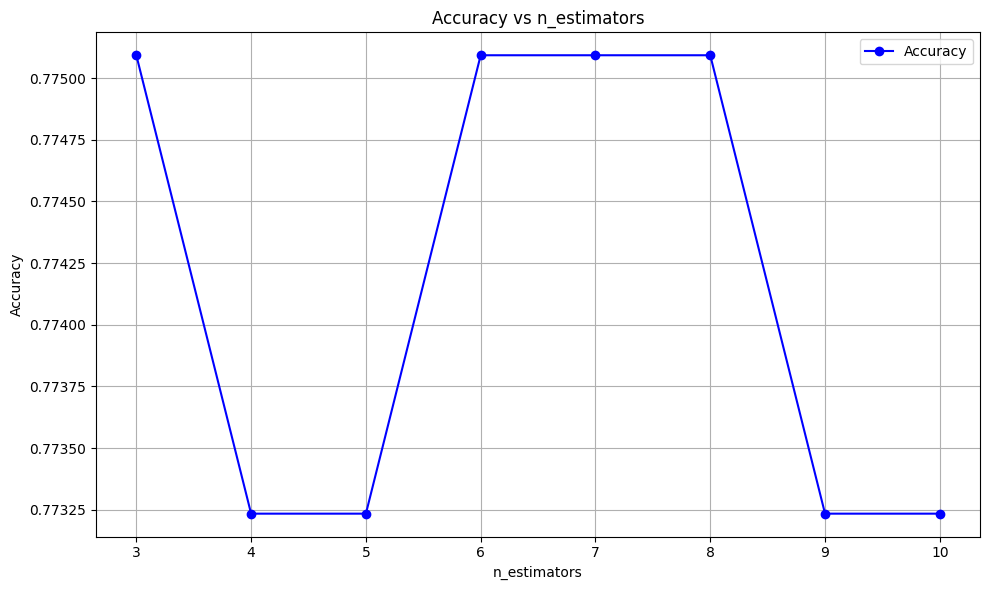

Optimal n_estimators: 3 with accuracy: 0.7751


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('btsc_training_80.csv')

# Misalkan kolom terakhir adalah target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Find the optimal n_estimators
best_n = 0
best_accuracy = 0

# Lists to store values for plotting
n_estimators_list = []
accuracy_list = []

for n in range(3, 11):  # Range of n_estimators from 3 to 10
    bagging = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n, random_state=42)
    bagging.fit(X, y)
    y_pred = bagging.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    n_estimators_list.append(n)
    accuracy_list.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_list, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f'Optimal n_estimators: {best_n} with accuracy: {best_accuracy:.4f}')


Setelah menemukan n_estimator yang optimal, yakni 3. Selanjutnya memprediksi target menggunakan bagging ensemble:

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
df_train = pd.read_csv('btsc_training_80.csv')

# Misalkan kolom terakhir adalah target
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

# Inisialisasi BaggingClassifier dengan GaussianNB sebagai base estimator
n_estimators = 3
bagging = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n_estimators, random_state=42)

# Training model
bagging.fit(X_train, y_train)

# Prediksi dengan model yang dilatih
y_train_pred = bagging.predict(X_train)

# Menampilkan hasil prediksi dan y_train yang asli
results = pd.DataFrame({'y_train': y_train, 'Prediksi': y_train_pred})
display(results)


,y_train,Prediksi
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
533,1.0,0.0
534,1.0,0.0
535,0.0,0.0
536,1.0,0.0


Selanjutnya menguji data dengan menggunakan bagging ensemble. berikut adalah programnya:

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load datasets
df_train = pd.read_csv('btsc_training_80.csv')
df_test = pd.read_csv('btsc_testing_20.csv')

# Misalkan kolom terakhir adalah target
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Inisialisasi BaggingClassifier dengan GaussianNB sebagai base estimator
n_estimators = 3
bagging = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n_estimators, random_state=42)

# Training model
bagging.fit(X_train, y_train)

# Prediksi pada data training
y_train_pred = bagging.predict(X_train)

# Prediksi pada data testing
y_test_pred = bagging.predict(X_test)

# Menampilkan hasil prediksi dan y_test yang asli
results_test = pd.DataFrame({'y_test': y_test, 'prediksi': y_test_pred})
display(results_test)

# Menghitung dan menampilkan akurasi pada data testing
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on testing data: {test_accuracy:.4f}')


,y_test,prediksi
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
130,0.0,0.0
131,0.0,0.0
132,0.0,0.0
133,0.0,0.0


Accuracy on testing data: 0.7630


Kesimpulan: akurasi yang didapat dari bagging ensemble adalah 0.76

## Pembuatan Website atau Aplikasi

Untuk pembuatan website saya menggunakan pickle. Berikut adalah langkah-langkahnya:

### Pickle

Saya memiliki 2 model, yakni untuk preprocessing menggunakan min-max normalization dan stacking:

In [ ]:
import pickle
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Membaca dataset testing (yang sudah memiliki prediksi KNN)
testing_data_with_pred = pd.read_csv('btsc_testing_80_with_pred.csv')

# Memisahkan fitur hasil prediksi KNN untuk meta model
X_meta_test = testing_data_with_pred[['pred_knn3', 'pred_knn5']]
y_test = testing_data_with_pred['target']

# Membuat model meta 
meta_model = GaussianNB()

# Melatih model meta (Naive Bayes) dengan hasil prediksi KNN
meta_model.fit(X_meta_test, y_test)

# Menyimpan model meta dengan pickle
with open('naive_bayes_meta_model.pkl', 'wb') as f:
    pickle.dump(meta_model, f)

# Memuat kembali model meta (Naive Bayes) dari file pickle
with open('naive_bayes_meta_model.pkl', 'rb') as f:
    loaded_meta_model = pickle.load(f)

# Menampilkan hasil prediksi dari model Naive Bayes
pred_nb = loaded_meta_model.predict(X_meta_test)

# Menampilkan beberapa hasil prediksi pertama
results = pd.DataFrame({
    'pred_nb': pred_nb,
    'y_test': y_test
})

print("Hasil Prediksi Naive Bayes pada Data Testing:")
display(results)


Disini saya memilih stacking diantara model lainnya(yakni perhitungan naive bayes ataupun ensemble bagging) dikarenakan keakuratan tertinggi diperoleh dari stacking (0,80).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics  # Tambahkan import ini untuk metrics

import pickle

# Load dataset
data = pd.read_csv('transfusion_normalized.csv')

# Memisahkan fitur dan target
X = data.drop('target', axis=1)  # Ganti 'target_column' dengan nama kolom target Anda
y = data['target']  # Ganti 'target_column' dengan nama kolom target Anda

# Memisahkan data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan model KNN dengan k=5 dan k=3
knn5 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn3 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# Definisikan model Gaussian Naive Bayes
gnb = GaussianNB()

# Definisikan stacking classifier dengan KNN dan GaussianNB sebagai estimators
estimators = [('knn5', knn5), ('knn3', knn3)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=gnb)

# Latih model stacking pada data training
stacking_clf.fit(X_train, y_train)

# Simpan model stacking ke dalam file pickle
filename = 'stacking_model.pickle'
with open(filename, 'wb') as file:
    pickle.dump(stacking_clf, file)

print(f"Model stacking telah disimpan sebagai {filename}")


Model stacking telah disimpan sebagai stacking_model.pickle


Selanjutnya saya menampilkan prediksi dari sample yang diberikan, yakni sebagai berikut:

In [ ]:
import pandas as pd
import pickle

# Load the trained model
with open('stacking_model.pickle', 'rb') as file:
    stacking_clf = pickle.load(file)

# Load the pre-processing scaler
scaler_filename = 'preprocessing_normalization.pickle'
with open(scaler_filename, 'rb') as scaler_file:
    pra_proses = pickle.load(scaler_file)

# Sample data for prediction (from your actual dataset)
# Contoh ini harus diambil dari dataset yang sudah di-scaler
data_sample = [[2, 10, 2500, 28]]  # Ubah dengan contoh data yang sesuai dari dataset Anda

# Pre-process the data sample
hasil = pra_proses.transform(data_sample)

# Predict using the loaded model
prediksi = stacking_clf.predict(hasil)

# Display the prediction result
print("Hasil Prediksi:", prediksi)


Hasil Prediksi: [1.]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Kesimpulan: Dari program diatas, dapat disimpulkan bahwa hasil prediksinya adalah 1, yakni pendonor tersebut kembali mendonorkan darah mereka kembali dalam rentang 6 bulan ke depan.

## Website Prediksi Donor Darah:

Berikut adalah link menuju aplikasi "Blood Transfusion Service Center Prediction" dengan menggunakn model dengan akurasi tertinggi: http://btscrev.pythonanywhere.com/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=facbb82e-230b-4c45-96ad-9a2dbae40698' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>